# Processing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%cd /content/drive/My Drive/Capstone Project/

/content/drive/My Drive/Capstone Project


In [5]:
import zipfile
import os
# Extract the archive
local_zip = './dataset_binary.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
os.chdir('..')
os.chdir('..')
os.chdir('..')
os.chdir('..')
zip_ref.extractall('tmp/CNN letter Dataset')
zip_ref.close()

In [6]:
import os

base_dir = 'tmp/CNN letter Dataset/'

class_0_dir = os.path.join(base_dir, '0')
class_1_dir = os.path.join(base_dir, '1')
class_O_dir = os.path.join(base_dir, 'O')

print('total training 0 images:', len(os.listdir(class_0_dir)))
print('total training 1 images:', len(os.listdir(class_1_dir)))
print('total training O images:', len(os.listdir(class_O_dir)))

class_0_files = os.listdir(class_0_dir)
print(class_0_files[:10])

class_1_files = os.listdir(class_1_dir)
print(class_1_files[:10])

class_O_files = os.listdir(class_O_dir)
print(class_O_files[:10])

total training 0 images: 1030
total training 1 images: 1030
total training O images: 32
['tes28.jpg', 'tes901.jpg', 'tes226.jpg', 'tes738.jpg', 'tes339.jpg', 'tes781.jpg', 'tes394.jpg', 'tes576.jpg', 'tes33.jpg', 'tes439.jpg']
['tes28.jpg', 'tes901.jpg', 'tes226.jpg', 'tes738.jpg', 'tes339.jpg', 'tes781.jpg', 'tes394.jpg', 'tes576.jpg', 'tes33.jpg', 'tes439.jpg']
['tes28.jpg', 'tes29.jpg', 'tes1.jpg', 'tes27.jpg', 'tes17.jpg', 'tes2.jpg', 'tes10.jpg', 'tes19.jpg', 'tes6.jpg', 'tes26.jpg']


# Model

In [23]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(75, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(36, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 73, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 47, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 21, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 10, 64)       

In [24]:
# Set the training parameters
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Image Preprocessing

In [25]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/CNN letter Dataset"
training_datagen = ImageDataGenerator(
	    # rotation_range=40,
      # width_shift_range=0.2,
      # height_shift_range=0.2,
      # shear_range=0.2,
      # horizontal_flip=True,
      # fill_mode='nearest',
      validation_split=0.1)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(75,100),
	class_mode='sparse',
  batch_size=62,
  subset='training'
)

validation_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(75,100),
	class_mode='sparse',
  batch_size=62,
  subset='validation'
)

Found 31979 images belonging to 36 classes.
Found 3553 images belonging to 36 classes.


# Training Model

In [26]:
# Train the model
history = model.fit(train_generator, epochs=35, validation_data = validation_generator, verbose = 1)

Epoch 1/35
516/516 [==============================] - 16s 30ms/step - loss: 0.9487 - accuracy: 0.8251 - val_loss: 0.2125 - val_accuracy: 0.9409
Epoch 2/35
516/516 [==============================] - 15s 30ms/step - loss: 0.0779 - accuracy: 0.9789 - val_loss: 0.1531 - val_accuracy: 0.9614
Epoch 3/35
516/516 [==============================] - 15s 30ms/step - loss: 0.0463 - accuracy: 0.9870 - val_loss: 0.1828 - val_accuracy: 0.9589
Epoch 4/35
516/516 [==============================] - 15s 30ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.2104 - val_accuracy: 0.9569
Epoch 5/35
516/516 [==============================] - 15s 29ms/step - loss: 0.0376 - accuracy: 0.9894 - val_loss: 0.1621 - val_accuracy: 0.9707
Epoch 6/35
516/516 [==============================] - 15s 29ms/step - loss: 0.0309 - accuracy: 0.9911 - val_loss: 0.1706 - val_accuracy: 0.9688
Epoch 7/35
516/516 [==============================] - 15s 29ms/step - loss: 0.0206 - accuracy: 0.9942 - val_loss: 0.1653 - val_accuracy:

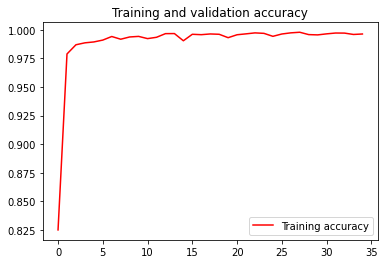

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [28]:
!ls

'2022-06-01 22_53_15-31.E 5235 RO-11-16.jpg ‎- Photos.png'   python-apt
 bin							    root
 boot							    run
 content						    sbin
 datalab						    srv
 dev							    sys
 etc							    tensorflow-1.15.2
 home							    test6.jpg
 lib							   'test8 (1).jpg'
 lib32							    test8.jpg
 lib64							    tmp
 media							    tools
 mnt							    usr
 opt							    var
 proc


In [29]:
tf.saved_model.save(model, '/content/savedmodel')

INFO:tensorflow:Assets written to: /content/savedmodel/assets


In [30]:
!tensorflowjs_converter \
            --input_format=tf_saved_model \
            --saved_model_tags=serve \
            /content/savedmodel \
            /content/json_file

2022-06-01 16:35:08.524243: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Writing weight file /content/json_file/model.json...


In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(75, 100))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  result = int(np.argmax(classes))
  dictionary = {0:'0', 1:'1', 2 :'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A',
    11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J', 20:'K',
    21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T',
    30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z'}
  print(dictionary[result])

Saving 2022-06-01 22_53_15-31.E 5235 RO-11-16.jpg ‎- Photos.png to 2022-06-01 22_53_15-31.E 5235 RO-11-16.jpg ‎- Photos (1).png
2022-06-01 22_53_15-31.E 5235 RO-11-16.jpg ‎- Photos.png
[[5.1625312e-07 5.0616753e-04 4.3377087e-05 2.8014460e-06 2.5211500e-07
  9.7548575e-05 5.2040639e-05 1.3723839e-05 9.9696690e-01 7.2417973e-04
  1.2279191e-04 7.3066624e-09 3.7525530e-07 2.5902145e-06 7.6984343e-06
  2.0945465e-05 6.3706125e-04 7.2568156e-09 1.4057748e-05 4.9406151e-10
  1.6476391e-04 1.6685258e-04 8.8173772e-05 4.6314997e-07 2.4499186e-06
  7.0836853e-05 9.4489988e-05 2.1117512e-07 1.4049433e-04 3.1997192e-07
  2.6828457e-06 1.0713844e-05 8.3638834e-06 2.4537392e-06 3.3667318e-05
  1.2638883e-07]]
8
